In [207]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.datasets as ds

In [209]:
n = 200

In [211]:
X, Y = ds.make_moons(n_samples=n, noise=0.1)

In [213]:
X = X.reshape(n, 2, 1)
Y = Y.reshape(n, 1, 1)

In [215]:
size = [2, 4, 4, 3, 2, 1]

In [217]:
weights = [0]
biases = [0]
for i in range(0, len(size) - 1):
    weights.append(np.random.rand(size[i + 1], size[i]))
    biases.append(np.random.rand(size[i + 1], 1))

In [219]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [221]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [223]:
def feed_forward(xi, weights, biases):
    activations = [xi]
    z1 = weights[1] @ xi + biases[1]
    a1 = sigmoid(z1)
    activations.append(a1)
    for i in range(2, len(weights)):
        zn = weights[i] @ activations[-1] + biases[i]
        an = sigmoid(zn)
        activations.append(an)
    return activations

In [225]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

In [227]:
def backprop(weights, biases, xi, y, activations):
    deltas = [0] * 6
    dL_dwK = [0] * 6
    dL_dbK = [0] * 6
    
    deltas[5] = ( activations[-1] - y ) * sigmoid_derivative(activations[-1])
    dL_dwK[5] = deltas[5] @ activations[4].T
    dL_dbK[5] = deltas[5]
    
    for i in range(4, 0, -1):
        deltas[i] = ( weights[i+1].T @ deltas[ i + 1 ] ) * sigmoid_derivative(activations[i])
        dL_dwK[i] = deltas[i] @ activations[ i - 1 ].T
        dL_dbK[i] = deltas[i]

    
    
    return dL_dwK, dL_dbK

In [229]:
act = feed_forward(X[2], weights, biases)
bc = backprop(weights, biases, X[2], Y[2], act)[0]
for w in bc:
    if type(w) is not int: print(w.shape)

(4, 2)
(4, 4)
(3, 4)
(2, 3)
(1, 2)


In [235]:
epochs = 2000
lr = 1
loss = []

In [237]:
for i in tqdm(range(epochs)):
    epochloss = 0
    for i, xi in enumerate(X):
        activations = feed_forward(xi, weights, biases)
        epochloss += L(activations[-1], Y[i])

        dL_dw, dL_db = backprop(weights, biases, xi, Y[i], activations)
        
        for i, w in enumerate(weights):
            w -= lr * dL_dw[i]
        for i, b in enumerate(biases):
            b -= lr * dL_db[i]
        
    loss.append(epochloss / len(X))

100%|██████████████████████████████████████| 2000/2000 [00:18<00:00, 108.92it/s]


In [239]:
weights

[0,
 array([[ 4.33501736, -3.50472958],
        [ 6.81168513,  4.73111061],
        [ 2.59931066, -3.49187914],
        [ 5.54245332, -3.29311419]]),
 array([[-0.04316851, -0.32641593, -0.37847764, -0.02778225],
        [ 3.46149405, -5.66456833,  2.30605283,  4.57464387],
        [ 1.67684114, -2.25349147,  0.95895714,  1.80883404],
        [ 3.40287727, -4.85680986,  2.12811646,  3.89522744]]),
 array([[ 0.06241478,  3.64301946,  1.54787671,  3.29248   ],
        [-0.39702127,  3.67725723,  1.62807003,  3.08991164],
        [-0.37061975,  2.65033121,  0.52252866,  2.41368895]]),
 array([[-3.3914079 , -3.29530239, -2.15792415],
        [-3.23108886, -3.12343511, -1.93518054]]),
 array([[-6.98705075, -6.63510597]])]

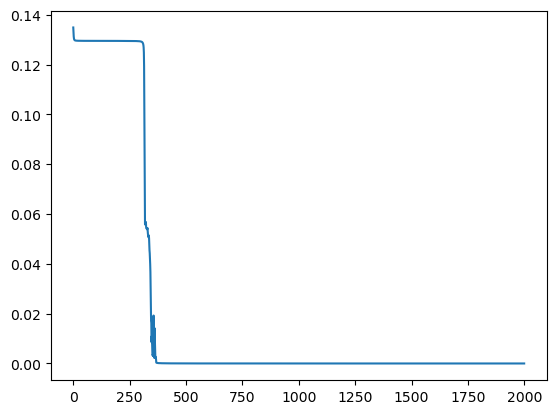

In [241]:
xcoord = np.array([n for n in range(epochs)]).reshape(epochs, 1)
ycoord = np.array(loss).reshape(epochs, 1)
plt.plot(xcoord, ycoord)
#plt.xscale('log')
#plt.yscale('log')

In [243]:
def evaluate_visually(x, w, b):
    rb = []
    for xi in x:
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: rb.append('red')
        else: rb.append('blue')
    return rb

In [245]:
rb = evaluate_visually(X, weights, biases)

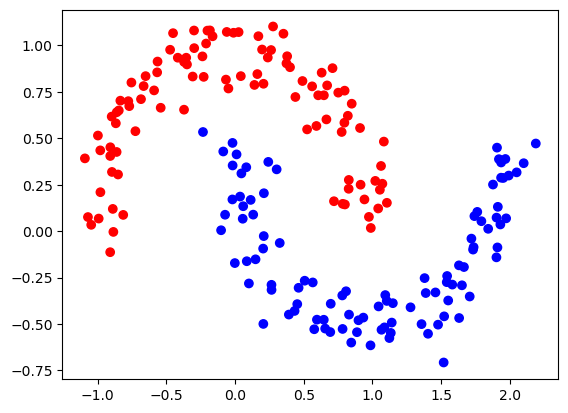

In [247]:
plt.scatter(X[:,0,:], X[:,1,:], c=rb)

In [249]:
def evaluate_errors(x, w, b, y):
    rb = []
    for i, xi in enumerate(x):
        p = 0
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: p = 0
        else: p = 1
        if p == Y[i, 0]:
            rb.append('gray')
        else: rb.append('red')
    return rb

In [251]:
br = evaluate_errors(X, weights, biases, Y)

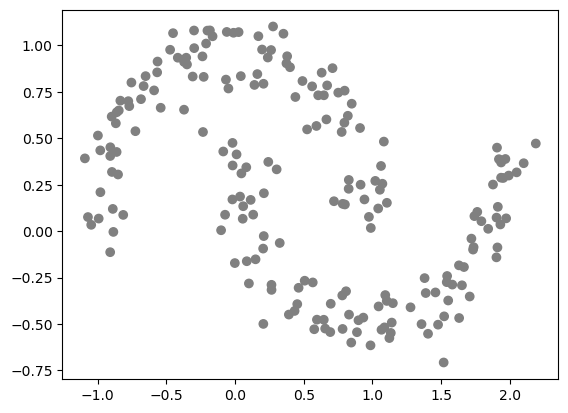

In [253]:
plt.scatter(X[:,0,:], X[:,1,:], c=br)